<a href="https://colab.research.google.com/github/KirstenClem/ds1002-knc2mgd/blob/main/homework/week-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Week 15

Complete the following blocks as specified in the directions. Run each cell to return the desired output. Save your notebook back to your GitHub repository and submit the GitHub URL to your notebook for review.

## 1. Create Functions (4 pts)

Create two functions in the cells below, according to the prompts given.

In [6]:
# create a function in R that:
#   1. takes a single integer as an input parameter
#   2. determines whether the integer is even or odd
#   3. returns a character statement "The integer <x> is even" or "The integer <x> is odd" (replace <x> with the actual input provided)
#
# then execute the function twice using two different input values, displaying even and odd results.

check_num <- function(x){
  if (x %% 2 == 0) {
    return(paste("The integer", x, "is even"))
  } else {
    return(paste("The integer", x, "is odd"))
  }
}

in_1 <- check_num(4)
in_2 <- check_num(7)


print(in_1)
print(in_2)

[1] "The integer 4 is even"
[1] "The integer 7 is odd"


In [9]:
# create a function in R that:
#   1. takes 4 integer input parameters
#   2. returns the mean value of the inputs
#   3. has default values for the 4 input parameters, in case they are not provided when the function is called.
#
# then execute the function twice: once where you provide the input values, and once where you do not.

calc_num <- function(a = 0, b = 0, c = 0, d = 0) {
  mean_val <- mean(c(a, b, c, d))
  return(mean_val)
}

input_num <- calc_num(2, 8, 5, 3)

none_in <- calc_num()

print(input_num)
print(none_in)


[1] 4.5
[1] 0


## 2. Plot Data (4 pts)

In the cell below, write the code required to plot from the `msleep` sample data set.

1. Display only animals with body weights of 30 or greater.
2. Group the animals by `order`.
3. Display the mean `sleep_total` for each group in a bar plot.

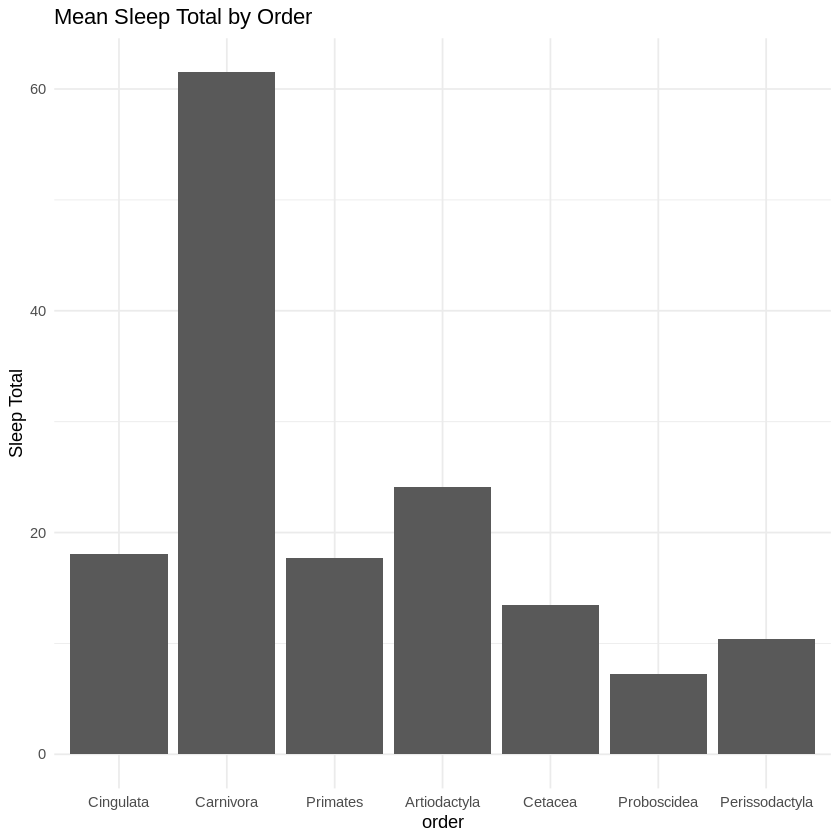

In [15]:
#
library(ggplot2)
data(msleep)

alt_data <- msleep[msleep$bodywt >= 30, ]

plot <- ggplot(alt_data, aes(x = reorder(order, -sleep_total), y = sleep_total)) +
  geom_col() +
  labs(title = "Mean Sleep Total by Order",
       x = "Order",
       y = "Sleep Total") +
  theme_minimal()

print(plot)


## 3. Clean and Analyze Data Using R (4 pts)

In the cells below use R to perform the following data cleaning steps on this file:
https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv

1. Remove any duplicate rows.
2. Remove any records where `last_login` or `birthdate` are empty.
3. Display only the records with the 10 highest `follower` counts.
4. Determine counts of users when grouped by continent.

In [19]:
#
library(dplyr)
library(readr)
url <- "https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv"
media_data <- read_csv(url)
media_data <- distinct(media_data)


Rows: 1318 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): username, full_name, birthdate, email, continent, last_login, inter...
dbl (1): followers

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
#
media_data <- media_data
media_data <- filter(media_data, complete.cases(last_login, birthdate))

In [37]:
#
follow_10 <- media_data
topfollow_10 <- head(arrange(follow_10,desc(followers)),10)
print(topfollow_10)


# A tibble: 10 × 8
   username   full_name birthdate email continent followers last_login interests
   <chr>      <chr>     <chr>     <chr> <chr>         <dbl> <chr>      <chr>    
 1 lleckeyb6  Lynne Le… 4/19/1998 llec… SA            99977 3/14/2021  sports   
 2 cduftondy  Celisse … 8/24/1995 cduf… OC            99707 9/26/2021  sports   
 3 dbartalin… Desiree … 8/23/1993 dbar… AF            99618 5/30/2022  music    
 4 grivardmp  Gwen Riv… 9/12/1982 griv… OC            99526 4/4/2020   music    
 5 kmorriceht Kitti Mo… 6/3/1995  kmor… SA            98936 3/24/2021  sports   
 6 smacdonne… Shoshann… 9/12/2002 smac… AS            98760 7/20/2021  music    
 7 ebroomq9   Early Br… 3/10/2000 ebro… AF            98606 10/22/2023 sports   
 8 schapell4j Shepard … 9/3/1993  scha… AS            98479 2/14/2021  music    
 9 tbaptiepo  Thorvald… 10/23/19… tbap… OC            98233 5/27/2022  sports   
10 nbarbeyq2  Nelson B… 12/15/19… nbar… OC            98172 6/18/2022  music    


In [41]:
#
continent_count <- count(media_data, continent)
colnames(continent_count) <- c("continent", "user_num")
print(continent_count)

# A tibble: 5 × 2
  continent user_num
  <chr>        <int>
1 AF              70
2 AS             111
3 EU              77
4 OC              95
5 SA              69
